In [30]:
import torch

path = r"C:\Users\82105\WG\runs\hidden_size_32_batch_size_256_src_len_180\checkpoints\checkpoint_epoch_10.pt"
checkpoint = torch.load(path)
print(checkpoint.keys())

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'eval_loss', 'train_loss', 'val_y_pred', 'val_y_true', 'test_y_pred', 'test_y_true'])


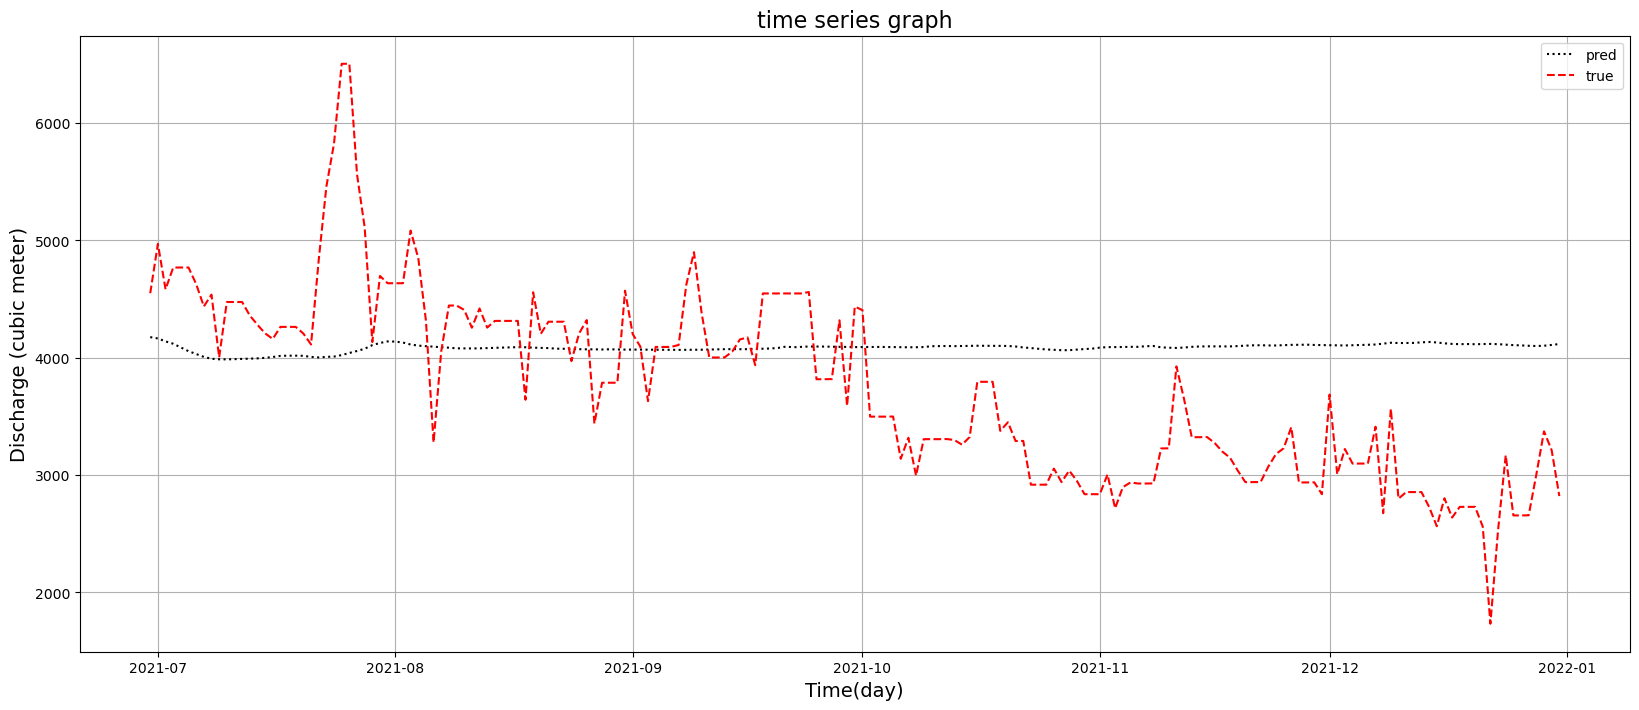

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
date_range = pd.date_range("2021-01-01", "2021-12-31", freq="D")
date_range = date_range[180:]
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(date_range, checkpoint["val_y_pred"], color='black', linestyle='dotted')
plt.plot(date_range, checkpoint["val_y_true"], color='red', linestyle='--')
plt.title('time series graph', fontsize=16)
plt.xlabel('Time(day)', fontsize=14)
plt.ylabel('Discharge (cubic meter)', fontsize=14)
plt.grid(True)
plt.legend(["pred", "true"])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


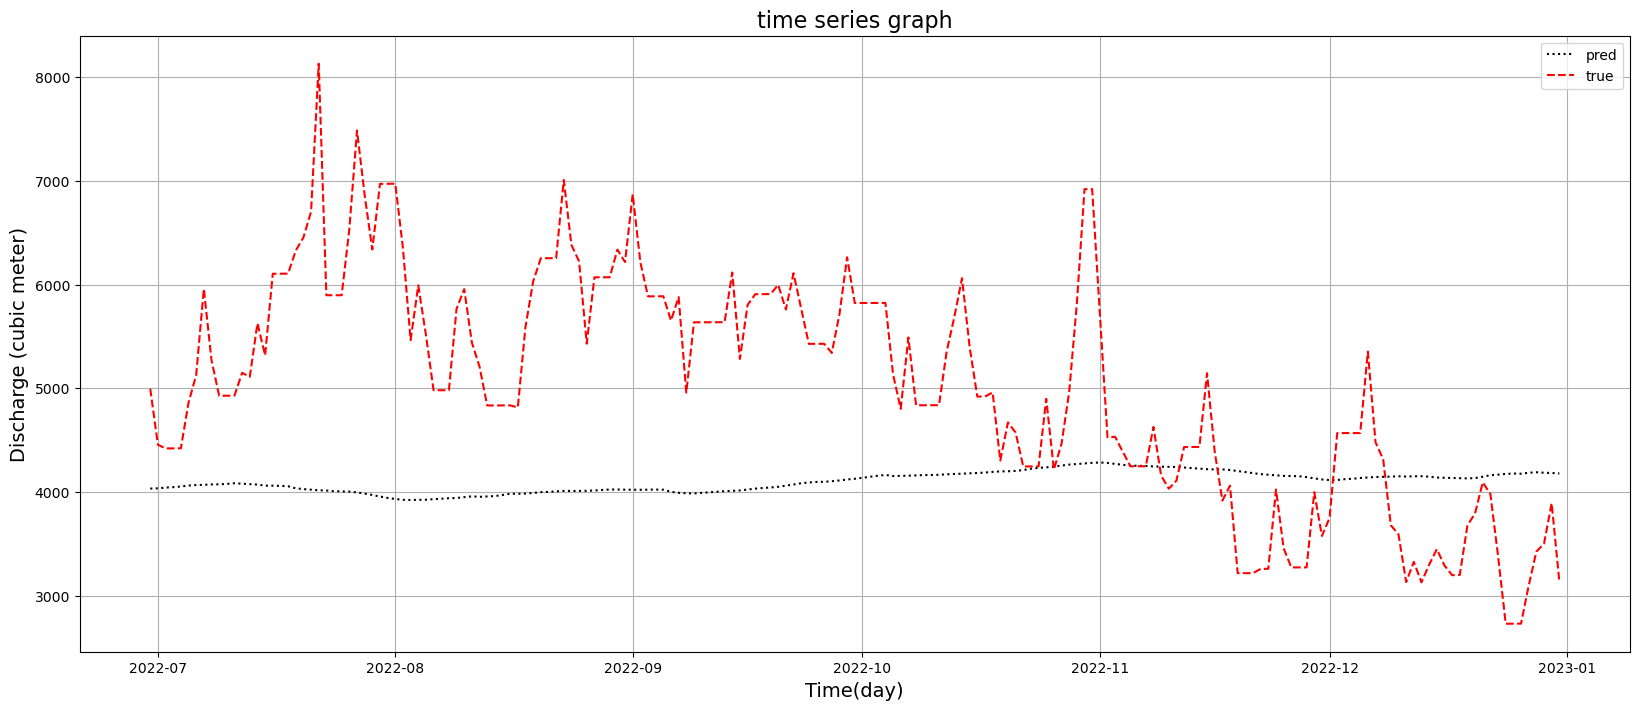

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

date_range = pd.date_range("2022-01-01", "2022-12-31", freq="D")
date_range = date_range[180:]
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(date_range, checkpoint["test_y_pred"], color='black', linestyle='dotted')
plt.plot(date_range, checkpoint["test_y_true"], color='red', linestyle='--')
plt.title('time series graph', fontsize=16)
plt.xlabel('Time(day)', fontsize=14)
plt.ylabel('Discharge (cubic meter)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.legend(["pred", "true"])
plt.show()

In [23]:
import hydroeval as he
nse = he.nse(checkpoint["test_y_pred"],checkpoint["test_y_true"])
kge, _, _, _ = he.kge(checkpoint["test_y_pred"],checkpoint["test_y_true"])
print(nse, kge)

[0.2601472] [0.38056061]


0.034814468517864565

In [11]:
import pandas as pd
df = pd.read_csv(r"./data/HP_Daily_Data.csv")
df.set_index("Date", inplace=True)
pr = df["Precipitation"].values
discharge = df["Discharge"].values

# calculate the correlation between precipitation and discharge
import numpy as np
np.corrcoef(pr, discharge)[0, 1]

for w in range(20, 360, 10):
    window_size = w
    cc_list = []
    for i in range(0,len(pr) - window_size + 1):
        pr_window = pr[i:i+window_size]
        discharge_window = discharge[i:i+window_size]
        np.corrcoef(pr_window, discharge_window)[0, 1]
        cc_list.append(np.corrcoef(pr_window, discharge_window)[0, 1])
    print("window_size: {} | corr coef: {}".format(w,np.mean(cc_list)))



window_size: 20 | corr coef: nan
window_size: 30 | corr coef: -0.0043630295468607815
window_size: 40 | corr coef: -0.0031117045384221496
window_size: 50 | corr coef: -0.003987472724793165
window_size: 60 | corr coef: -0.003852169645352917
window_size: 70 | corr coef: -0.0016064405744823395
window_size: 80 | corr coef: 0.0008767134672704045
window_size: 90 | corr coef: 0.0024443232025999407
window_size: 100 | corr coef: 0.004331212379109485
window_size: 110 | corr coef: 0.00741236813183385
window_size: 120 | corr coef: 0.010639566565781607
window_size: 130 | corr coef: 0.013771535478934399
window_size: 140 | corr coef: 0.017082663482153492
window_size: 150 | corr coef: 0.020447813101660575
window_size: 160 | corr coef: 0.023562371295118897
window_size: 170 | corr coef: 0.026859734429889395
window_size: 180 | corr coef: 0.030710906727906096
window_size: 190 | corr coef: 0.033938136884009824
window_size: 200 | corr coef: 0.036077046359124725
window_size: 210 | corr coef: 0.038139034272574